### Exploring the relationship between memeber information and the trip duration

## by (Muhammad Abdullahi Said)

## Investigation Overview


> In this investigation, I wanted to look at the relationship between member information (age, gender and user_type) and trip duration (duration_minute, start_hourofday, start_dayofweek). To see if the member information determines the duration of the trip



## Dataset Overview

> The dataset contains the details of 183412 trips with 16 attributes. Most variables are numeric in nature, but the variables start_station_name, end_station_name, user_type and member_gender are qualitative nominal variables. Feature engineering was done on duration_sec column to create more columns (duration_minute, start_date, start_hourofday, start_dayofweek, start_month). Some outliers like age (greater than 80) and trips (greater than 60 minutes) were removed. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('C:/Users/Muhammad Abdullahi/Downloads/fordgobike.csv')

In [3]:
# drop null values
df.dropna(axis=0,inplace=True)

# convert start_time and end_time into datetime 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# convert start_station_id, end_station_id, and bike_id into strings
df.start_station_id = df.start_station_id.astype('str')
df.end_station_id = df.end_station_id.astype('str')
df.bike_id = df.bike_id.astype('str')

# convert user_type and member_gender into categories
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')

In [4]:
# add new columns for trip duration in minute, hour of the day, day of week and month

df['duration_minute'] = df['duration_sec']/60
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hourofday'] = df.start_time.dt.strftime('%H')
df['start_dayofweek'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')

In [5]:
# Calculating Age from 'member_birth_year'
df['Age'] = 2022 - df['member_birth_year']

In [6]:
df1 = df[df["Age"] <= 80]
df2 = df1[df["duration_minute"] <= 60]

## (Relationship between trip duration and age)
Plotting trip duration_minute against age will display the correlation between the attributes.
From the plot I can say there's a negative correlation between the age and the trip duration. Also older people tend to spend less minute on the trip, although there are some few exceptions.

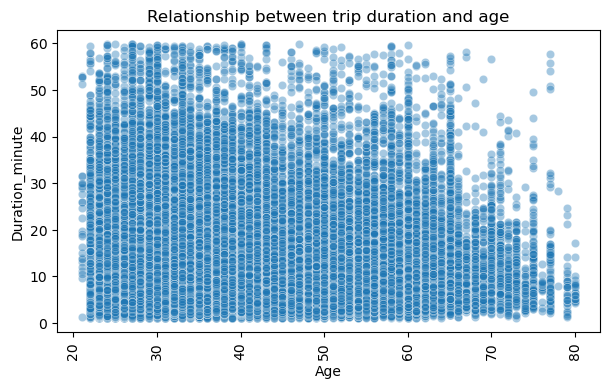

In [7]:
plt.figure(figsize = (7,4), dpi = 100)

# plotting a scatter plot
sns.scatterplot(data=df2, y='duration_minute',x='Age',color=base_color,alpha= 0.4)

# calling our function
x_y_t('Age','Duration_minute',"Relationship between trip duration and age")

# rotating the age values
plt.xticks(rotation = 90)

plt.show()

## (Distribution of trip duration by Gender)
Plotting trip duration_minute against gender will display the relationship between the time of the trip and gender of the people. From the distribution male riders seem to have shorter trips compared to females and other gender types, this is evident by smaller median and shorter IQR. However, the difference is very small and we are not sure whether it is significant or not.

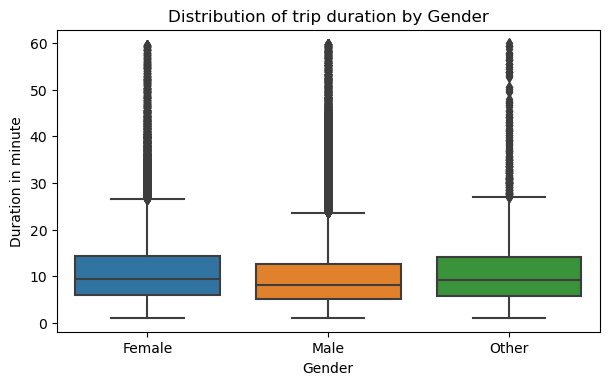

In [8]:
plt.figure(figsize = (7,4), dpi = 100)

# plotting a box plot
sns.boxplot(data = df2, x = "member_gender", y = "duration_minute")

# calling our function
x_y_t('Gender','Duration_minute',"Distribution of trip duration by Gender")
plt.show();

## (Distribution of trip duration by user type)
Plotting trip duration_minute against user_type will display the relationship between the time of the trip and user_type, whether Customer or Subscriber.
From the distribution subscribers have shorter trips, whearas customers have longer trips

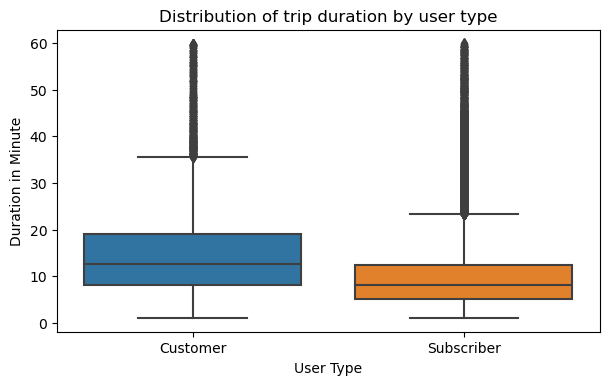

In [9]:
plt.figure(figsize = (7,4), dpi = 100)

# plotting a box plot
sns.boxplot(data = df2, x = "user_type", y = "duration_minute")

# calling our function
x_y_t('User Type','Duration_minute',"Distribution of trip duration by user type")
plt.show();

## (Distribution of gender and duration for each user type)
Plotting gender and trip duration_minute for each user_type will show wich gender for each user_type has the highest trip duration. From the distribution you can see that Customers have a higher trip duration than subscribers, also others category of the member gender have higher trip duration in all user_type. At the end, Other's category of the Customer user_type has a trip duration of more than 25 minutes which is the highest.

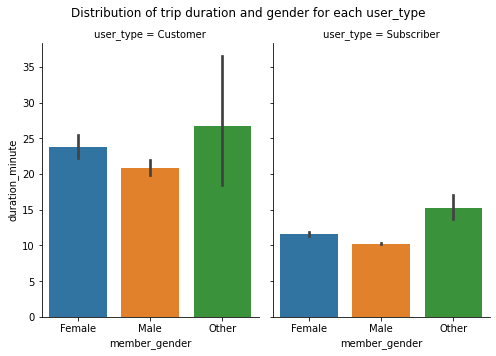

In [10]:
# plotting a cat plot
plot = sns.catplot(x = "member_gender", y = "duration_minute",
                col = "user_type",
                data = df, kind = "bar",
                height=5, aspect=.7)

# adjusting the subplot
plot.fig.subplots_adjust(top=0.88)

# giving the plot a suptitle
plot.fig.suptitle('Distribution of trip duration and gender for each user_type');

## (Age and trip duration for each user type)
Plotting age and trip duration_minute for each user_type will show the correlation between age and trip duration for each user_type. From the scatter plot you can see a negative correlation between them. Also, younger Customers trip duration is slightly more than younger subscribers and older subscribers trip duration is lower than older customers

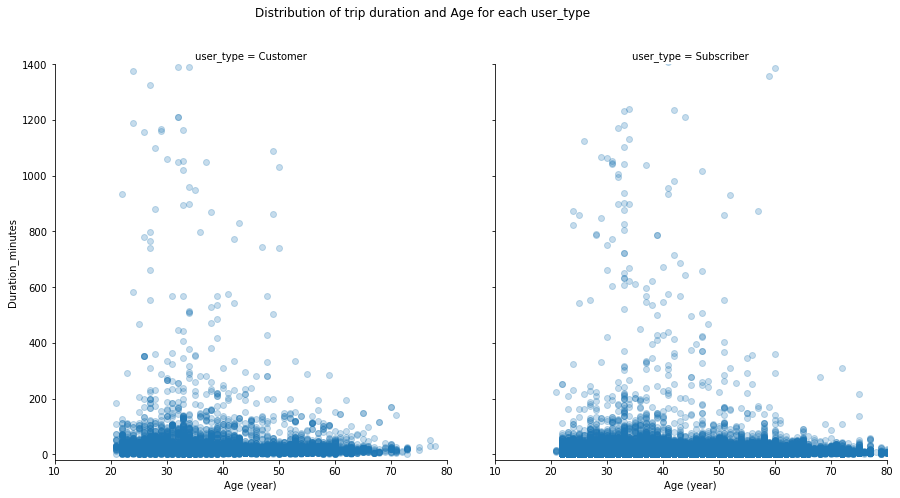

In [11]:
user_types = sns.FacetGrid(data = df1, col = 'user_type', col_wrap = 2,
                           xlim = [10,80], ylim = [-20, 1400])
user_types.map(plt.scatter, 'Age', 'duration_minute', alpha=0.25)
user_types.fig.set_size_inches(14,8);
user_types.set_xlabels('Age (year)')
user_types.set_ylabels('Duration_minutes')
user_types.fig.subplots_adjust(top=0.88)
user_types.fig.suptitle('Distribution of trip duration and Age for each user_type')
plt.show;

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [14]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_notebook.ipynb to slides
[NbConvertApp] Writing 1031864 bytes to Part_II_notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Muhammad Abdullahi\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Muhammad Abdullahi\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Muhammad Abdullahi\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Muhammad Abdullahi\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Muhammad Abdullahi\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebook

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
